In [49]:
import ujson as json
import os
%matplotlib inline
import utils
import matplotlib.pyplot as plt

In [3]:
from utils import *
from __future__ import division, print_function
from shutil import copyfile
from sklearn.metrics import log_loss
import pandas as pd

In [4]:
from keras.utils import get_file

Using TensorFlow backend.


In [5]:
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical


/home/paperspace/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
def get_image_vector(image,size=(64,64)):
    return cv2.resize(image,size).flatten()

In [196]:
def extract_color_histogram(image):
    #th = cv2.adaptiveThreshold(image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    cv2.normalize(hist,hist)
    return hist.flatten()

In [180]:
train_dir = "../Train_Fish/"


In [181]:
classes = os.listdir(train_dir)
classes = [x for x in os.listdir(train_dir) if not x.startswith('.')]

In [182]:
print (classes)

['Fish_3', 'Fish_6', 'Fish_1', 'Fish_2', 'Fish_7', 'Fish_5', 'Fish_4']


In [183]:
image_path_list = []
for c in classes:
    fish_images = [train_dir+c+'/'+item for item in os.listdir(train_dir+c+'/')]
    image_path_list.extend(fish_images)

In [184]:
labels = []
for c in classes:
    l = [c]*len(os.listdir(train_dir+c+'/'))
    labels.extend(l)

In [185]:
labels = LabelEncoder().fit_transform(labels)

In [197]:
features = []
for i,image_path in enumerate(image_path_list):
    image = cv2.imread(image_path,0)
    hist = extract_color_histogram(image)
    features.append(hist)
    if(i%100==0):
        print(str(i)+ "  completed")


0  completed
100  completed


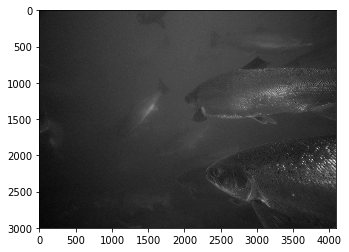

In [167]:
image = cv2.imread(image_path,1) 
gray_image1 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

th = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

plt.imshow(gray_image1, cmap = 'gray')

In [198]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.30, random_state = 42)

In [199]:
print (type(X_train))

<type 'list'>


In [200]:
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

In [201]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [202]:
accuracy = model.score(X_test,y_test)

In [203]:
print (accuracy)

0.8235294117647058


In [204]:
preds_validation = model.predict_proba(X_test)

In [205]:
log_loss(y_test,preds_validation)

0.22336151178905614

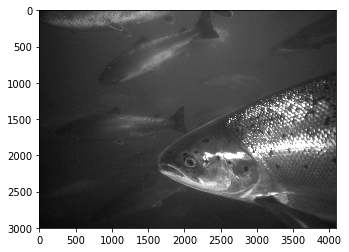

In [169]:
import cv2
image = cv2.imread('/home/paperspace/Documents/insight/Train_Fish/Fish_1/Basler acA4112-8gc (40003213)_20180326_134801204_0246-Copy1.jpg',1)
# plt.imshow(image)
#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image1 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image1, cmap = 'gray')
#cv2.imwrite('gray_image.png',gray_image)
#cv2.imshow('color_image',image)
#cv2.imshow('gray_image',gray_image) 



In [148]:
th = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

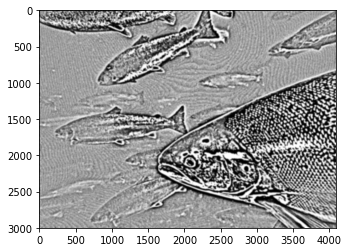

In [139]:
plt.imshow(th, cmap = 'gray', interpolation = 'bicubic')